# 🌍 COVID-19 Data Analysis & Visualization

This notebook performs exploratory data analysis (EDA) on the OWID COVID-19 dataset. We will visualize total cases, deaths, new daily cases, and death rates for selected countries and generate insights.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
covid_df = pd.read_csv("owid-covid-data.csv")

# View the structure
print(covid_df.columns)      # List of columns
print(covid_df.shape)        # Rows and columns
print(covid_df.head())       # Preview first 5 rows

# Check for missing data
print(covid_df.isnull().sum().sort_values(ascending=False))


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [13]:
# Filter countries of interest
countries = ['Kenya', 'United States', 'India', 'South Africa', 'China']
df_filtered = covid_df[covid_df['location'].isin(countries)].copy()

# Convert date to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Drop rows with missing critical values
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

# Optionally fill forward for missing values
df_filtered = df_filtered.ffill()


In [14]:
# Set plotting aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)


## 📈 Total COVID-19 Cases Over Time


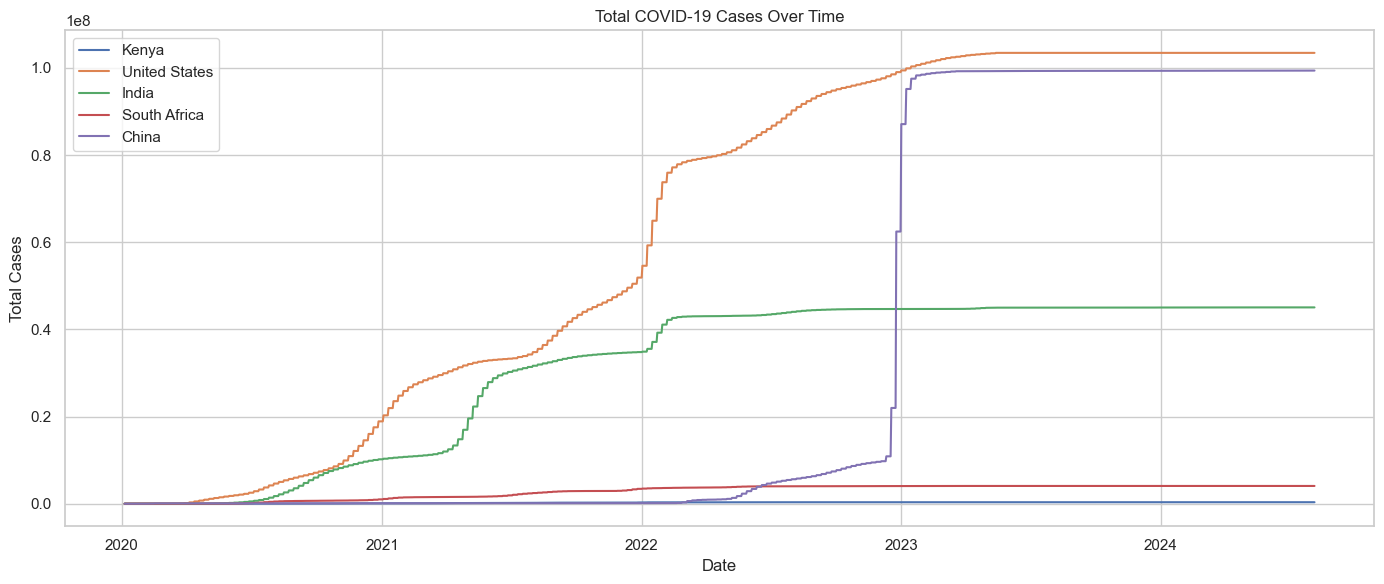

In [15]:
plt.figure()
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


## 💀 Total COVID-19 Deaths Over Time


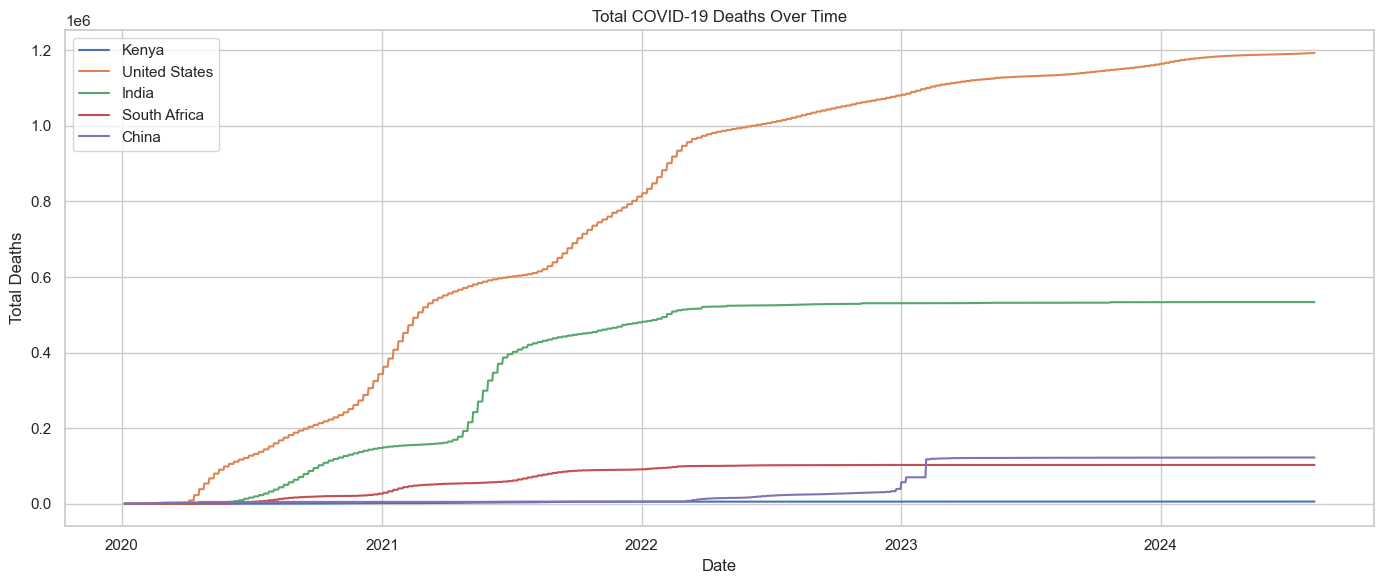

In [16]:
plt.figure()
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


## 🦠 New Daily COVID-19 Cases


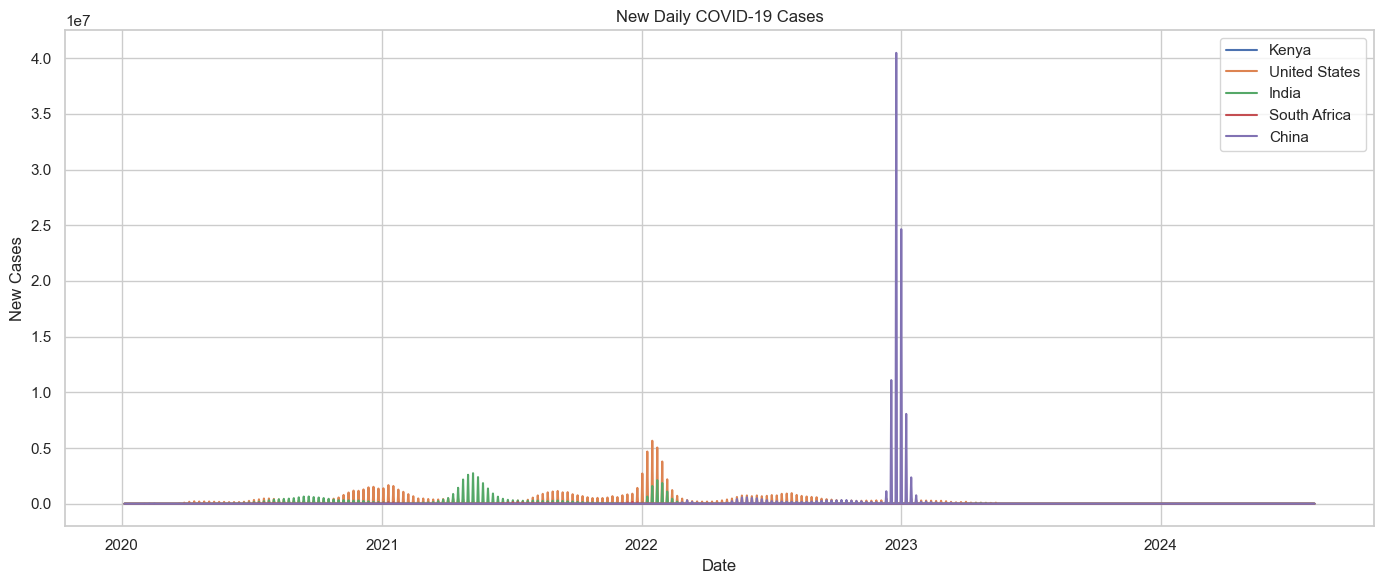

In [17]:
plt.figure()
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('New Daily COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


## 📉 COVID-19 Death Rate (Deaths / Cases)


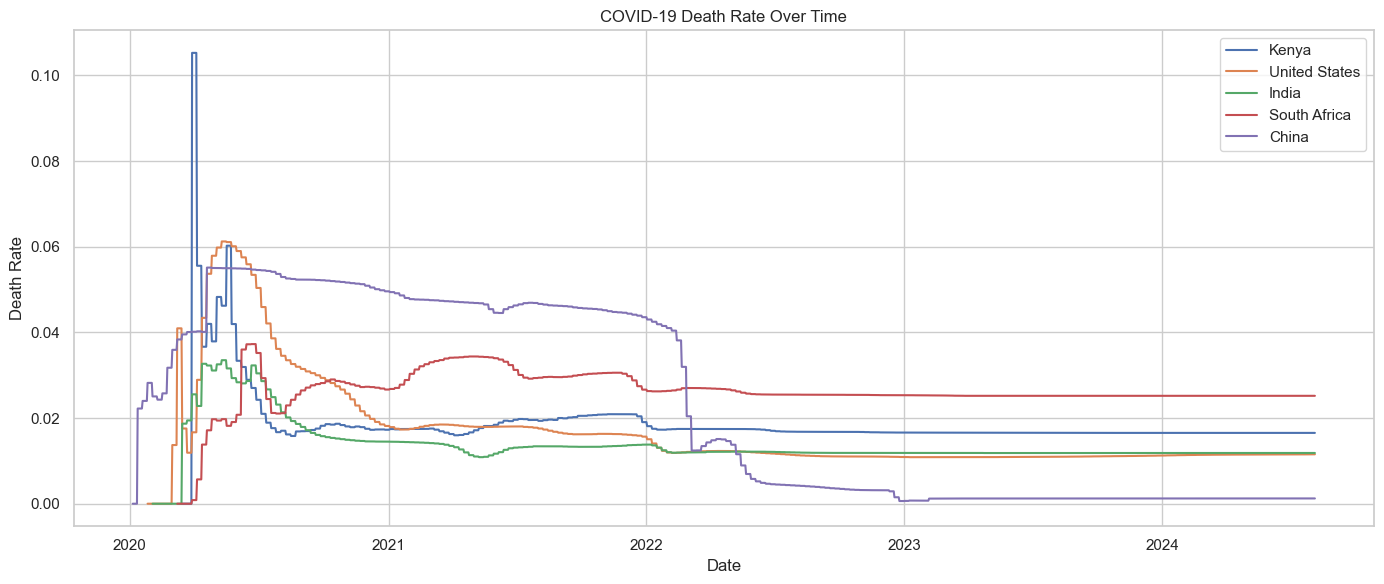

In [18]:
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure()
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()


### Total COVID-19 Vaccinations Over Time

We begin by filtering the dataset to focus on five countries of interest: **Kenya, United States, India, South Africa, and China**.

After cleaning the data to remove missing values, we visualize the total number of COVID-19 vaccinations administered over time in each country.

This line chart shows how vaccination campaigns progressed at different rates depending on vaccine availability, infrastructure, and public health policies. The United States and China show an early and steep rise in vaccinations, while countries like Kenya and South Africa experienced a more gradual rollout.

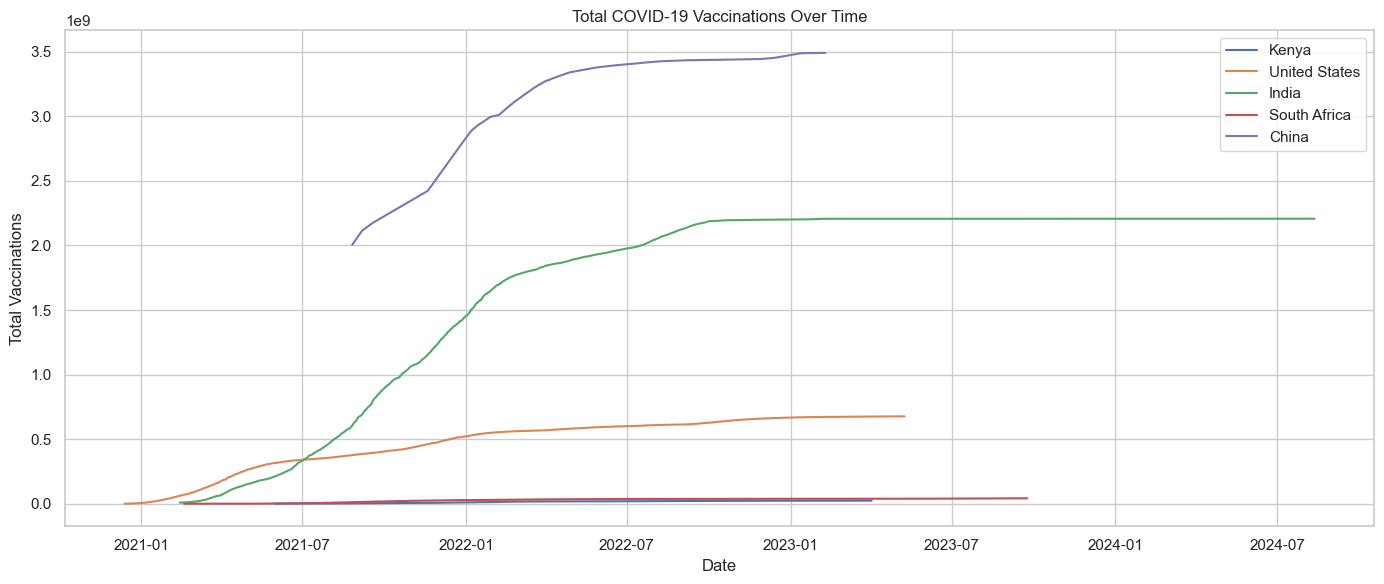

In [19]:
# Filter for countries of interest
countries = ['Kenya', 'United States', 'India', 'South Africa', 'China']
df_vaccination = covid_df[covid_df['location'].isin(countries)].copy()

# Convert date to datetime
df_vaccination['date'] = pd.to_datetime(df_vaccination['date'])

# Drop rows with missing vaccination data
df_vaccination = df_vaccination.dropna(subset=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'])

# ------------------------------
# 1. Total Vaccinations Over Time
# ------------------------------
plt.figure(figsize=(14, 6))
for country in countries:
    subset = df_vaccination[df_vaccination['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

## 🏆 Top 10 Countries by Total Cases (Latest Date)


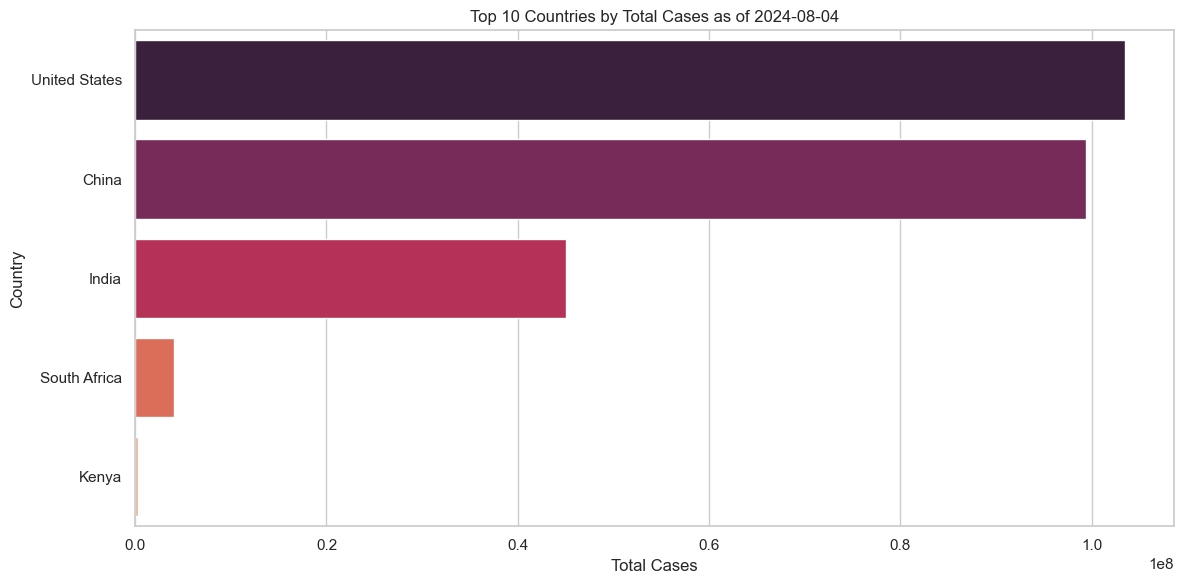

In [20]:
latest_date = df_filtered['date'].max()
latest_df = df_filtered[df_filtered['date'] == latest_date]
top10_cases = latest_df[['location', 'total_cases']].dropna().sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top10_cases, hue='location', palette='rocket', dodge=False, legend=False)
plt.title(f'Top 10 Countries by Total Cases as of {latest_date.date()}')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## 📊 Key Insights

1. **Total Cases Over Time**:  
   - The United States leads in total reported cases.  
   - India shows a surge in mid-2021, likely due to the Delta wave.

2. **Death Rate Trends**:  
   - South Africa’s higher death rate hints at systemic healthcare challenges.  
   - China shows a consistently low death rate.

3. **Daily Cases**:  
   - The US and India have sharp spikes, showing intense transmission periods.  
   - Kenya has slower, more gradual increases.

4. **Top 10 Countries**:  
   - The US tops the chart even as of the latest date.  
   - China’s reported total remains low compared to peers.

## 🔍 Anomalies

- **China**: Outlier in both cases and death rates; may be due to containment success or data opacity.  
- **South Africa**: High death rates prompt further analysis on healthcare disparities.  
- **India**: 2021 Delta variant had severe impact—highlighted by the dramatic spike in new cases.
